In [2]:
# Import das bibliotecas
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Funções
def imgShow(img, nome):
    # Mostra a imagem
    cv2.imshow(nome, img)
    # Espera que uma tecla seja pressionada
    cv2.waitKey(0)
    # Limpa a instância do opencv
    img.release()
    # Fecha a janela
    cv2.destroyAllWindows()

def mostraInfos(img):
    # Mostra imagem
    print("Matriz da imagem:")
    print (img)
    # Mostra as informações da imagem
    print("Informações da imagem:")
    print (img.shape)
    # Mostra o tipo da imagem
    print("Tipo da imagem:")
    print (type(img))

def threshold_binary(img, min, max):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ret, thresh = cv2.threshold(gray, min, max, cv2.THRESH_BINARY)
    return thresh

# def capShow(cap):

    

## 1. Leitura de imagens

In [4]:
# Começa com a leitura da imagem
img = cv2.imread('./media/memes.jfif')
# # A imagem é composta por 3 matrizes, uma camada azul, uma verde e outra vermelha, para RGB
print (img)
# # Imprime uma tupla com a altura, largura e quantidade de camadas da imagem
# # 597 pixels de altura, 599 pixels de largura e 3 camadas de imagem
print (img.shape)
print (type(img))
# # Script comumente usando para visualizar a imagem
# # Método que mostra a imagem
cv2.imshow('image', img)
# # Key para quando pressionada feche a imagem
cv2.waitKey(0)
# # Método para fechar a imagem quando a tecla for pressionada
cv2.destroyAllWindows()

[[[167 176 179]
  [167 176 179]
  [167 176 179]
  ...
  [161 171 178]
  [161 171 178]
  [161 171 178]]

 [[167 176 179]
  [167 176 179]
  [167 176 179]
  ...
  [160 170 177]
  [160 170 177]
  [160 170 177]]

 [[167 176 179]
  [167 176 179]
  [167 176 179]
  ...
  [159 169 176]
  [159 169 176]
  [159 169 176]]

 ...

 [[136 148 160]
  [138 150 162]
  [133 145 157]
  ...
  [143 153 160]
  [142 152 159]
  [143 153 160]]

 [[141 153 165]
  [143 155 167]
  [138 150 162]
  ...
  [139 149 156]
  [138 148 155]
  [139 149 156]]

 [[141 153 165]
  [143 155 167]
  [138 150 162]
  ...
  [140 150 157]
  [139 149 156]
  [140 150 157]]]
(652, 653, 3)
<class 'numpy.ndarray'>


In [ ]:
# Adicionando uma flag de leitura em preto e branco
img2 = cv2.imread('./media/memes.jfif', cv2.IMREAD_GRAYSCALE)

mostraInfos(img2)
imgShow(img2, 'imagem')

# Salvar a imagem no disco, é possível ler em um formato e salvar em outro
cv2.imwrite('output.jpg', img2)

## 2. Personalizando a imagem

In [ ]:
# Desenhar nas imagens:
img3 = cv2.imread('./media/memes.jfif')
# Desenhar uma linha
# Passa primeiro a imagem, em seguida a coordenada de inicio, coordenada final, cor, espessura da linha
# O plano cartesionado funciona normal para o eixo x e o crescente do y é para baixo:
cv2.line(img3, (0,0), (100,100), (255,255,255), 15)
imgShow(img3)

# Desenhar shapes
# Desenhar um retângulo, mesmos args da linha
img4 = cv2.imread('./media/memes.jfif')
cv2.rectangle(img4, (0,0), (100,100), (180,40,30), 15)
imgShow(img4)

# Desenhar pontos
img5 = cv2.imread('./media/memes.jfif')
pts = np.array([[10,5], [20,30], [100,140]], np.int32)
# Recebe uma imagem, um array com os pontos, para fechar o ultimo ponto com os primeiros, chamamos True, recebe cor e a borda
cv2.polyLines(img5, [pts], True, (0,255,0), 15)
imgShow(img5)

# Desenhar circulo
img6 = cv2.imread('./media/memes.jfif')
cv2.circle(img6, (0,0), (100,100), (180,40,30), 15)
imgShow(img6)

## 3. Leitura de vídeo

In [ ]:
# Para armazenar o vídeo em uma variável
cap = cv2.VideoCapture('./media/video.mp4')
# Para ler a webcam chama-se o index
cap2 = cv2.VideoCapture(0)
# Para ler a captura
while(True):
    ok, frame = cap.read()
    # Se a imagem não tiver sido lida, o programa vai parar
    if not ok:
        break
    cv2.imshow('frame', frame)
    # Aqui ele espera por um evento do teclado, e responde em 100 ms, o ord('q') faz com que quando o q seja pressionado o programa pare
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# Limpa o vídeo da memória
cap.release()

## 4. Lendo a WebCam

In [ ]:
n = 0
# Lendo a webcam
while(True):
    ok2, frame2 = cap2.read()
    # Se a imagem não tiver sido lida, o programa vai parar
    if not ok2:
        break
    # Imprime um texto na imagem em todos os frames da imagem
    cv2.putText(frame2, 
               'Hello world', 
               (100, 50), 
               cv2.FONT_ITALIC, 
               1, 
               (15,30,40), 
               cv2.LINE_4)
    n = n + 1
    # Imprimir a quantidade de frames, atualizando a string de frame-a-frame
    cv2.putText(frame2, 
               str(n), 
               (150, 50), 
               cv2.FONT_ITALIC, 
               1, 
               (150,40,150), 
               cv2.LINE_4)
    # A leitura das cores é (B,G,R)
    cv2.imshow('frame', frame2)
    # Aqui ele espera por um evento do teclado, e responde em 100 ms, o ord('q') faz com que quando o q seja pressionado o programa pare
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap2.release()
cv2.destroyAllWindows()

## 5. Gravando e armazenando vídeo

In [ ]:
# Essa condição é importante para processar um vídeo que roda por um algoritmo e não seja real time
cap = cv2.VideoCapture(0)
# Cria um codec de processamento, simples mas eficaz no windows
codec = cv2.VideoWriter_fourcc(*'XVID')
# Salva o vídeo, nome, codec, taxa de processamento, tamanho
writer = cv2.VideoWriter('out.avi', codec, 20, (640,480))
while(True):
    ok, frame = cap.read()
    if not ok:
        break
    # Escreve o video no frame
    # Basicamente o que ele tá fazendo aqui é gerando um vídeo e salvando ele em uma matriz
    writer.write(frame)
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
writer.release()
cv2.destroyAllWindows()

## 6. Recorte

In [ ]:
matrix = np.array([
    [1,2,3,4,5,6,7,8,9],
    [10,20,30,40,50,60,70,80,90],
    [100,200,300,400,500,600,700,800,900],
    [1000,2000,3000,4000,5000,6000,7000,8000,9000]
])
# Vai retornar as linas de 0 a 2 sem entrar a 2 e o indice 4
croped = matrix[0:2,4]
print(croped)
img = cv2.imread('./memes.jfif')
cv2.imshow('image', img)
cv2.waitKey(0)
# Eixo Y, Eixo X
croped2 = img[100:400, 50:400]
cv2.imshow('image', croped2)
cv2.waitKey(0)
# E se eu quisesse começar em um ponto e ele fizesse a leitura de 500px a partir daquele ponto
y = 100
h = 500 # Altura
x = 50
w = 400 # Largura
# Supondo que os pontos iniciais foram pegues através de uma feature
croped3 = img[y:y+h, x:x+w]
cv2.imshow('image', croped3)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 7. Operações matemáticas

In [13]:
def show(img):
    plt.imshow(img)
    plt.show()

In [ ]:
img = cv2.imread('./media/memes.jfif')
show(img)
# Percebe-se que as tonalidades da imagem são diferentes
# O openCV lê em BGR, enquanto o matplot lê em RGB
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
show(img2)

In [18]:
# Mostra as cores em determinado pixel
img[55,55]

array([159, 168, 171], dtype=uint8)

In [ ]:
# Substitui as cores de um pixel por outras cores
img2[55,55] = np.array([0,0,0])
show(img2)

In [ ]:
# Substitui em um intervalo
img2[100:300, 100:200] = [255, 255, 255]
show(img2)

In [ ]:
# Soma duas imagens
res = img * img2
show(res)
# Subtrai duas imagens
res2 = img2 - img
show(res2)
# Soma duas imagens
res = cv2.add(img, img2)
show(res)

## 8. Thresholding

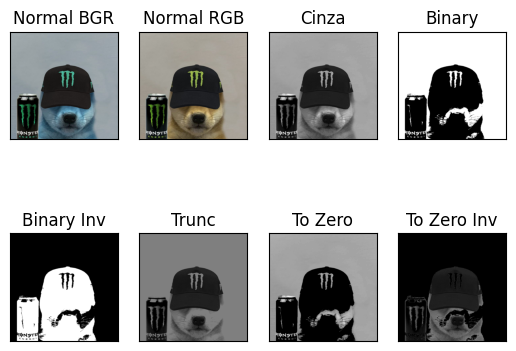

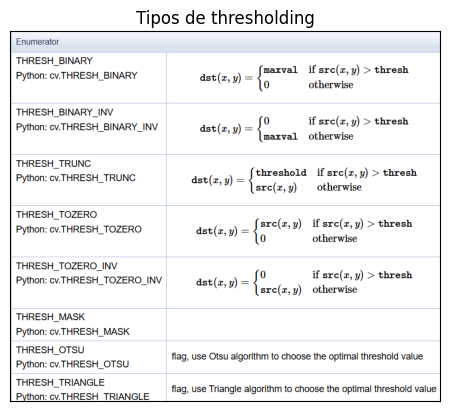

In [38]:
import cv2
import matplotlib.pyplot as plt

# Threshold (limiarização) é uma técnica de processamento de imagens que consiste em separar pixels de uma imagem em duas categorias distintas, normalmente preto e branco, a partir de um valor limiar. Esse valor é escolhido com base em características da imagem que se deseja destacar ou ignorar.

# Importa imagem
res = cv2.imread('./media/memes.jfif')

# Converte de BGR para gray
gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)

# Converte a imagem para gray a partir da leitura dela
gray2 = cv2.imread('./media/memes.jfif' , cv2.IMREAD_GRAYSCALE)

min = 127
max = 255

# Aplicando o Thresholding
#ret, thresh1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
# pixel, variável = cv2.threshold(imagem_cinza, menor valor de cor, maior valor de cor, tipo de threshold)
ret, thresh1 = cv2.threshold(gray, min, max, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(gray, min, max, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(gray, min, max, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(gray, min, max, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(gray, min, max, cv2.THRESH_TOZERO_INV)

# Convertendo BGR para RBG para que o matplot imprima
res2 = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)

titles = ['Normal BGR', 'Normal RGB', 'Cinza', 'Binary', 'Binary Inv', 'Trunc', 'To Zero', 'To Zero Inv']
imgs = [res, res2, gray, thresh1, thresh2, thresh3, thresh4, thresh5]


for i in range(len(imgs)):
    plt.subplot(2,4,i+1)
    plt.imshow(imgs[i], 'gray', vmin = 0, vmax = 255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

# cv2.imshow('normal', imgs[0])
# cv2.imshow('imagem', gray)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

thresh_types_bgr = cv2.imread('./media/thresholding_types.png')
thresh_types = cv2.cvtColor(thresh_types_bgr, cv2.COLOR_BGR2RGB)
plt.subplot(1,1,1)
plt.imshow(thresh_types, 'gray')
plt.title('Tipos de thresholding')
plt.xticks([]),plt.yticks([])
plt.show()

### 8.1. Filtros

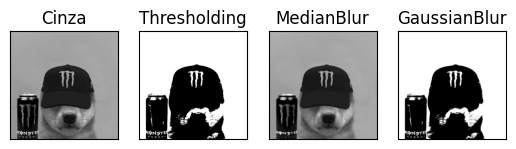

In [21]:
import cv2
import matplotlib.pyplot as plt

min = 127
max = 255

def threshold_binary(gray, min, max):
    ret, thresh = cv2.threshold(gray, min, max, cv2.THRESH_BINARY)
    return thresh

img = cv2.imread('./media/memes.jfif', cv2.IMREAD_GRAYSCALE)
thresh = threshold_binary(img, min, max)

# Incrementa um borrão na imagem, 5, 7, 9, ..., n
img2 = cv2.medianBlur(img, 9)


# Os filtros são utilizados para realçar ou suavizar caracteristícas de uma imagem. 

# Filtro Gaussiano: reduz ruídos, suaviza a imagem e retira detalhes desnecessários.
blur = cv2.GaussianBlur(thresh, (5,5), 0)
# Parâmetros:
# void cv::GaussianBlur	(	InputArray 	src,
#                             OutputArray dst,
#                                  Size ksize,
#                                 double sigmaX,
#                                 double sigmaY = 0,
#                                 int borderType = BORDER_DEFAULT,
#                                 AlgorithmHint hint = cv::ALGO_HINT_DEFAULT 
# )

# blur = cv2.GaussianBlur(thresh, )

titles = ['Cinza', 'Thresholding', 'MedianBlur', 'GaussianBlur']
resultados = [img, thresh, img2, blur]

for i in range(len(resultados)):
    plt.subplot(1,4,i+1)
    plt.imshow(resultados[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()


# for i in range(len(resultados)):
#     cv2.imshow(titles[i], resultados[i])


# Filtro Laplaciano: Realça as bordas da imagem
laplacian = cv2.Laplacian(blur, cv2.CV_64F)
# Deve receber a imagem suavizada e um filtro, o utilizado foi padrão 3x3

# cv2.imshow('Threshold', thresh)
cv2.imshow('Filtro Gaussiano', blur)
cv2.imshow('Laplacian', laplacian)
cv2.waitKey(0)
cv2.destroyAllWindows()


### 8.2. Adaptive Thresholding

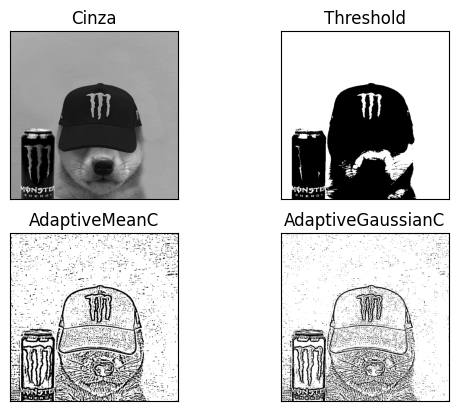

In [42]:
import cv2
import matplotlib.pyplot as plt

# Em casos onde há mais de uma fonte de iluminação pode não ser apropriado colocar um valor global para o Thresholding ([[ret]], thresh = ...), ao invés disso se torna interessante colocar um limiar adaptativo. Onde o algoritmo determina o limite de um pixel com base em uma pequena região ao seu redor. Portanto, obtemos limites diferentes para diferentes regiões da mesma imagem, o que fornece melhores resultados para imagens com iluminação variável.

min = 127
max = 255
blocksize = 11
c = 2

img = cv2.imread('./media/memes.jfif', cv2.IMREAD_GRAYSCALE)

# Threshold binario
ret, th1 = cv2.threshold(img, min, max, cv2.THRESH_BINARY)
# Threshold adaptativo
th2 = cv2.adaptiveThreshold(img, max, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blocksize, c)
th3 = cv2.adaptiveThreshold(img, max, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blocksize, c)
# blockSize: Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.
# C: Constant subtracted from the mean or weighted mean (see the details below). Normally, it is positive but may be zero or negative as well.

titles = ['Cinza', 'Threshold', 'AdaptiveMeanC', 'AdaptiveGaussianC']
images = [img, th1, th2, th3]

for i in range(len(images)):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

# cv2.imshow('Imagem', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
    

## 9. Transformações

In [43]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./media/memes.jfif')



cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()